## Thêm các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## Đọc dữ liệu từ file .csv

In [3]:
# Đọc dữ liệu từ file .csv
df = pd.read_csv('data/air-satisfaction-dataset.csv')

## Kiểm tra sự phân bố của dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   lid                                25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

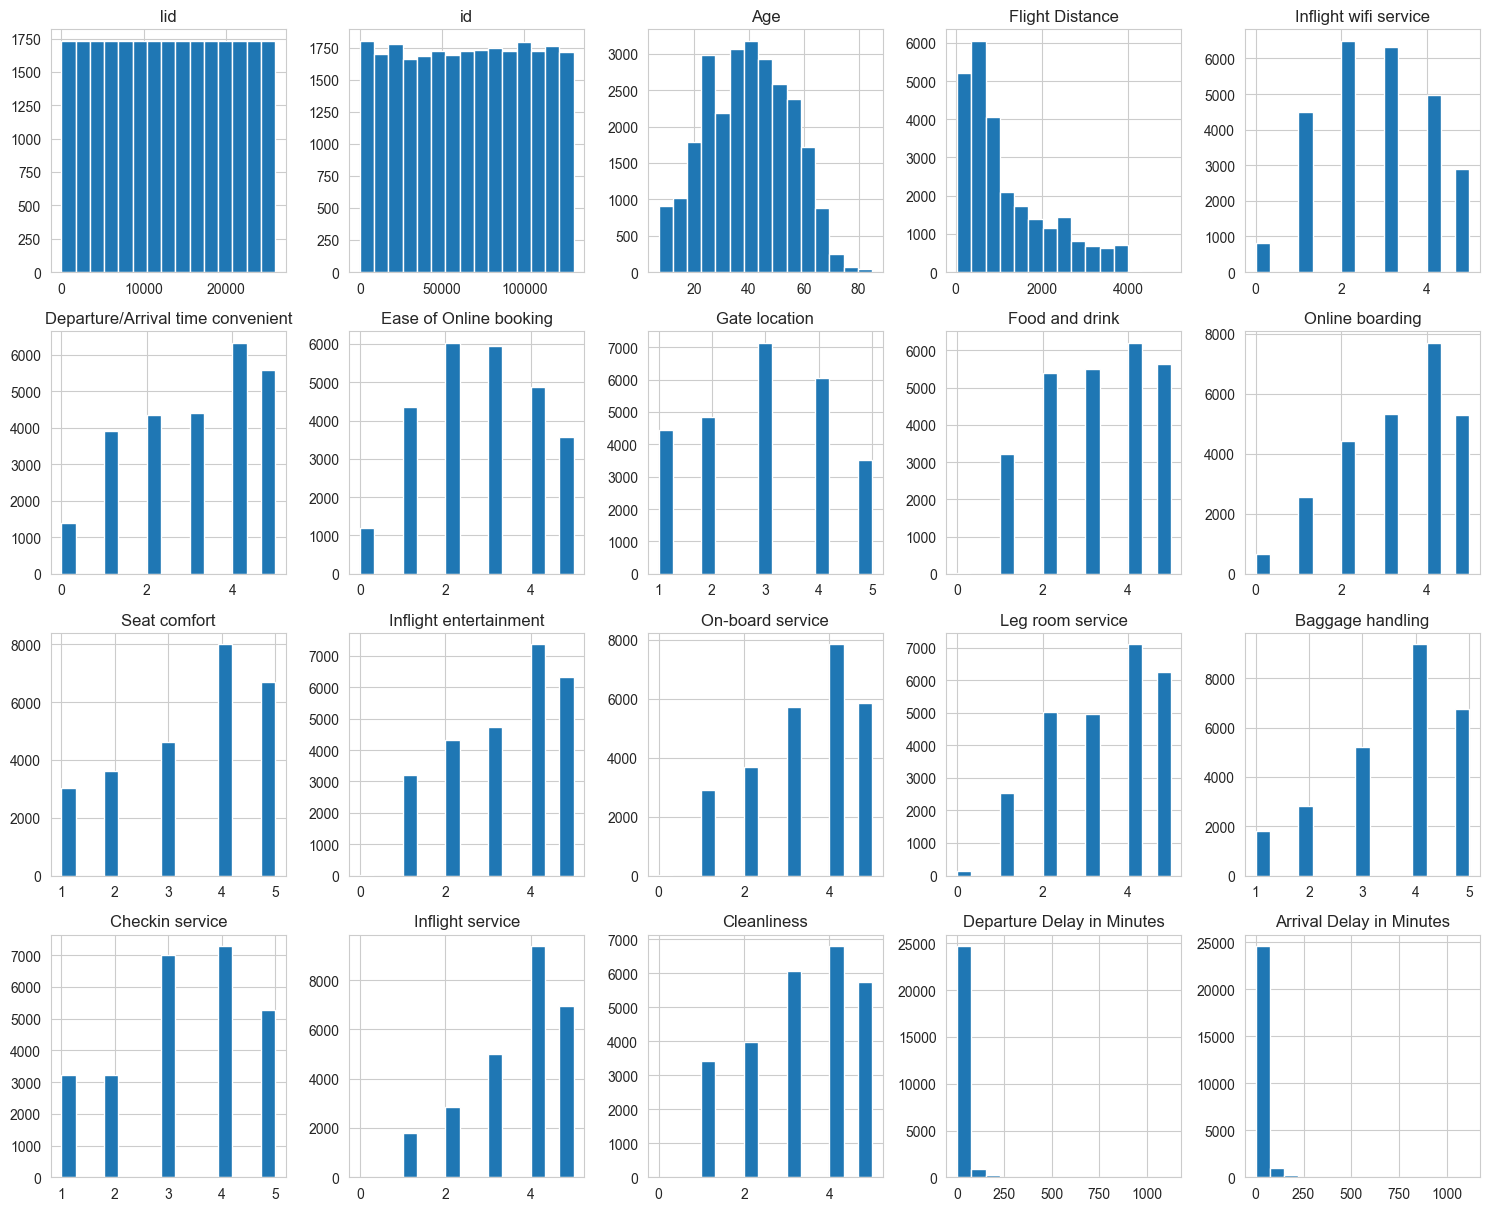

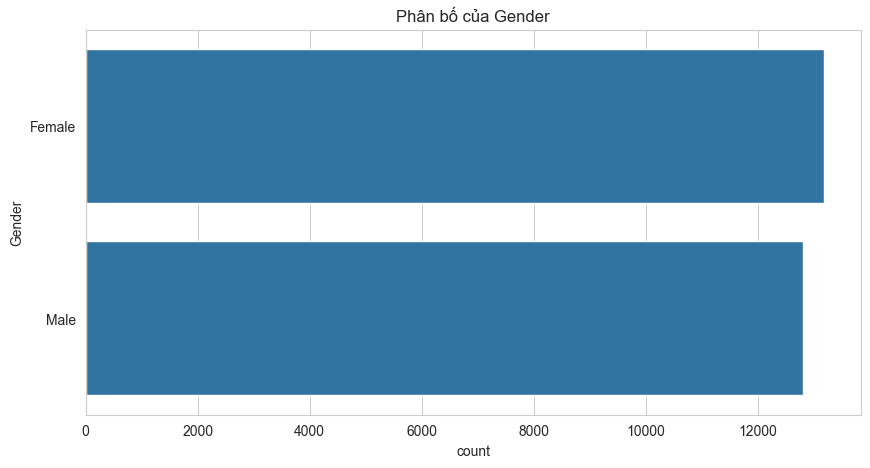

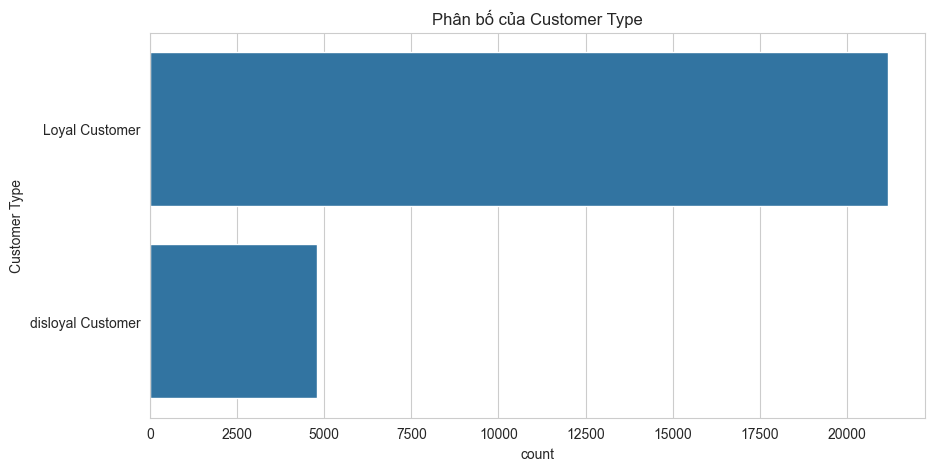

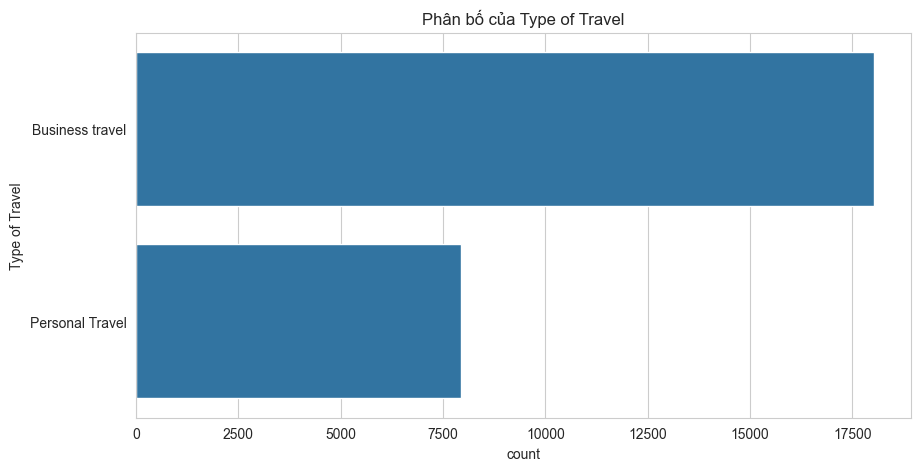

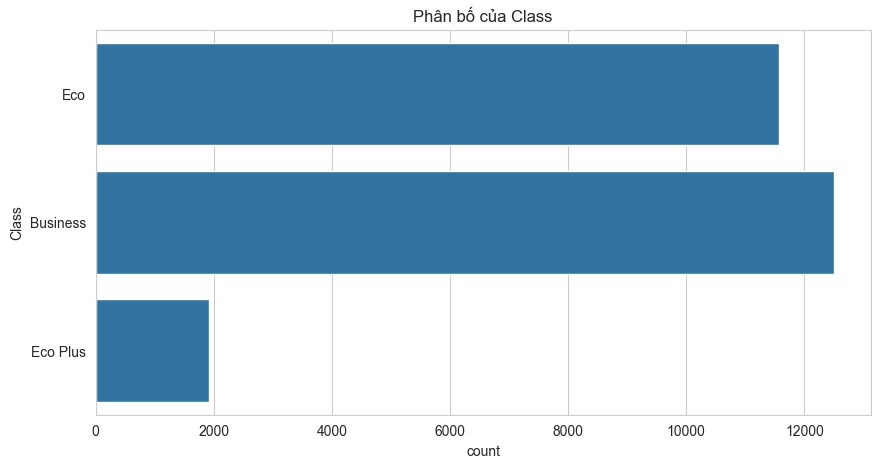

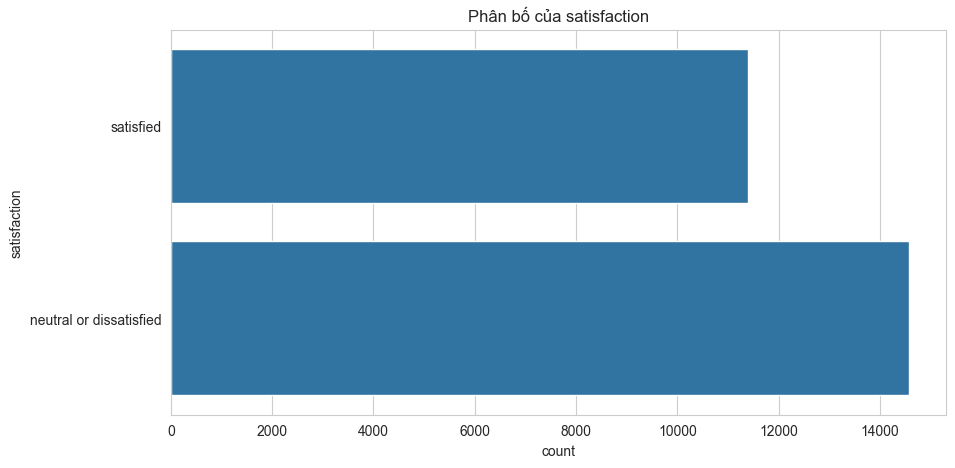

In [4]:
# Hiển thị thông tin cơ bản về dữ liệu
print(df.info())

# Kiểm tra phân bố của các thuộc tính số
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns].hist(bins=15, figsize=(15, 15), layout=(5, 5))
plt.tight_layout()
plt.show()

# Kiểm tra phân bố của các thuộc tính phân loại (categorical)
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=column, data=df)
    plt.title(f'Phân bố của {column}')
    plt.show()

## Trước khi tiền xử lý dữ liệu

In [5]:
tableBefore = PrettyTable()
tableBefore.field_names = df.columns.tolist()

for index, row in df.head().iterrows():
    tableBefore.add_row(row.tolist())

print(tableBefore)

+-----+-------+--------+-------------------+-----+-----------------+----------+-----------------+-----------------------+-----------------------------------+------------------------+---------------+----------------+-----------------+--------------+------------------------+------------------+------------------+------------------+-----------------+------------------+-------------+----------------------------+--------------------------+-------------------------+
| lid |   id  | Gender |   Customer Type   | Age |  Type of Travel |  Class   | Flight Distance | Inflight wifi service | Departure/Arrival time convenient | Ease of Online booking | Gate location | Food and drink | Online boarding | Seat comfort | Inflight entertainment | On-board service | Leg room service | Baggage handling | Checkin service | Inflight service | Cleanliness | Departure Delay in Minutes | Arrival Delay in Minutes |       satisfaction      |
+-----+-------+--------+-------------------+-----+-----------------+----

## Sau khi tiền xử lý dữ liệu

In [6]:
# Tiền xử lý dữ liệu với các dữ liệu categorical
tableAfter = PrettyTable()
tableAfter.field_names = df.columns.tolist()

label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])
    
# Một vài dữ liệu ở vị trí đầu tiên
for index, row in df.head().iterrows():
    tableAfter.add_row(row.tolist())
    
print(tableAfter)

+-----+---------+--------+---------------+------+----------------+-------+-----------------+-----------------------+-----------------------------------+------------------------+---------------+----------------+-----------------+--------------+------------------------+------------------+------------------+------------------+-----------------+------------------+-------------+----------------------------+--------------------------+--------------+
| lid |    id   | Gender | Customer Type | Age  | Type of Travel | Class | Flight Distance | Inflight wifi service | Departure/Arrival time convenient | Ease of Online booking | Gate location | Food and drink | Online boarding | Seat comfort | Inflight entertainment | On-board service | Leg room service | Baggage handling | Checkin service | Inflight service | Cleanliness | Departure Delay in Minutes | Arrival Delay in Minutes | satisfaction |
+-----+---------+--------+---------------+------+----------------+-------+-----------------+------------

## Xử lý NaN

In [7]:
nan = np.isnan(df)
print(np.where(nan))
df.dropna(inplace=True)
nanAfter = np.isnan(df)
print(np.where(nanAfter))

(array([  516,   656,  1071,  1224,  1589,  1816,  1832,  2771,  2911,
        3194,  3197,  3428,  3488,  3516,  3557,  3713,  3906,  4023,
        4580,  5215,  5954,  6378,  6419,  6556,  7031,  7087,  8195,
        8217,  8550,  8985, 10151, 10244, 11151, 11687, 12296, 12699,
       12790, 12954, 13125, 13291, 13474, 13967, 14082, 14446, 14652,
       14788, 14898, 15628, 15716, 15719, 16430, 16594, 16939, 17295,
       17423, 17602, 17841, 17877, 18070, 18076, 18835, 18963, 19061,
       19588, 19672, 20032, 20143, 20382, 20409, 20468, 20490, 20738,
       21740, 21953, 22007, 23024, 23308, 23801, 24072, 24133, 24301,
       25128, 25468], dtype=int64), array([23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23

## Phân chia tập dữ liệu

In [8]:
train_rate = 0.7
test_rate = 0.2
validation_rate = 0.1

# Chia tập dữ liệu Train/Test trước
X_train, X_temp, y_train, y_temp = train_test_split(df.drop('satisfaction', axis=1), df['satisfaction'], test_size=(1 - train_rate), random_state=42)

# Chia tập dữ liệu Test/Validate sau
X_test, X_validate, y_test, y_validate = train_test_split(X_temp, y_temp, test_size=(validation_rate / (test_rate + validation_rate)), random_state=42)

table = PrettyTable()

## Thuật toán Naive Bayes Classification (Sử dụng GaussianNB)

In [9]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

joblib.dump(nb_model, 'trained-model/sklearn/GaussianNB_model.pkl')

# Không sử dụng tập validation
y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

table.title = "Mô hình Naive Bayes Classification (GaussianNB)"
table.field_names = ['Thước đo', 'Tỉ lệ (%)']

table.add_row(['Accuracy', f"{accuracy * 100:.2f}"])
table.add_row(['Precision', f"{precision * 100:.2f}"])
table.add_row(['Recall', f"{recall * 100:.2f}"])
table.add_row(['F1-score', f"{f1 * 100:.2f}"])

table.align = "l"  # Căn chỉnh văn bản sang trái
table.padding_width = 1  # Điều chỉnh độ rộng của khoảng cách

print(table)

+-------------------------------------------------+
| Mô hình Naive Bayes Classification (GaussianNB) |
+------------------------+------------------------+
| Thước đo               | Tỉ lệ (%)              |
+------------------------+------------------------+
| Accuracy               | 79.59                  |
| Precision              | 75.76                  |
| Recall                 | 79.61                  |
| F1-score               | 77.64                  |
+------------------------+------------------------+


## Thuật toán SVM (kernel linear)

In [10]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

joblib.dump(svm_linear, 'trained-model/sklearn/SVM_linear_model.pkl')

y_pred = svm_linear.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

table.clear()
table.title = "Mô hình SVM (kernel=linear)"
table.field_names = ['Thước đo', 'Tỉ lệ (%)']
table.add_row(['Accuracy', f"{accuracy * 100:.2f}"])
table.add_row(['Precision', f"{precision * 100:.2f}"])
table.add_row(['Recall', f"{recall * 100:.2f}"])
table.add_row(['F1-score', f"{f1 * 100:.2f}"])

table.align = "l"  # Căn chỉnh văn bản sang trái
table.padding_width = 1

print(table)

+-----------------------------+
| Mô hình SVM (kernel=linear) |
+--------------+--------------+
| Thước đo     | Tỉ lệ (%)    |
+--------------+--------------+
| Accuracy     | 81.96        |
| Precision    | 82.81        |
| Recall       | 75.05        |
| F1-score     | 78.74        |
+--------------+--------------+


## Thuật toán SVM (kernel rbf)

In [11]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

joblib.dump(svm_rbf, 'trained-model/sklearn/SVM_rbf_model.pkl')

y_pred = svm_rbf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

table.clear()
table.title = "Mô hình SVM (kernel=rbf)"
table.field_names = ['Thước đo', 'Tỉ lệ (%)']
table.add_row(['Accuracy', f"{accuracy * 100:.2f}"])
table.add_row(['Precision', f"{precision * 100:.2f}"])
table.add_row(['Recall', f"{recall * 100:.2f}"])
table.add_row(['F1-score', f"{f1 * 100:.2f}"])

table.align = "l"  # Căn chỉnh văn bản sang trái
table.padding_width = 1

print(table)

+--------------------------+
| Mô hình SVM (kernel=rbf) |
+------------+-------------+
| Thước đo   | Tỉ lệ (%)   |
+------------+-------------+
| Accuracy   | 62.75       |
| Precision  | 69.87       |
| Recall     | 28.68       |
| F1-score   | 40.66       |
+------------+-------------+


## Thuật toán SVM (kernel poly)

In [12]:
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)

joblib.dump(svm_poly, 'trained-model/sklearn/SVM_poly_model.pkl')

y_pred = svm_poly.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

table.clear()
table.title = "Mô hình SVM (kernel=poly)"
table.field_names = ['Thước đo', 'Tỉ lệ']
table.add_row(['Accuracy', f"{accuracy * 100:.2f}"])
table.add_row(['Precision', f"{precision * 100:.2f}"])
table.add_row(['Recall', f"{recall * 100:.2f}"])
table.add_row(['F1-score', f"{f1 * 100:.2f}"])

table.align = "l"  # Căn chỉnh văn bản sang trái
table.padding_width = 1

print(table)

+---------------------------+
| Mô hình SVM (kernel=poly) |
+----------------+----------+
| Thước đo       | Tỉ lệ    |
+----------------+----------+
| Accuracy       | 60.10    |
| Precision      | 71.23    |
| Recall         | 17.40    |
| F1-score       | 27.96    |
+----------------+----------+


## Thuật toán Artificial Neural Network

In [7]:
ann_model = Sequential()
ann_model.add(Input(shape=(24,)))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

# Biên dịch mô hình
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
ann_train = ann_model.fit(X_train, y_train, epochs=64, batch_size=16, validation_data=(X_validate, y_validate), verbose=1)

ann_model.save('trained-model/tensorflow/ann_model.keras')

y_pred = ann_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

table.clear()
table.title = "Mô hình Artificial Neural Network"
table.field_names = ['Thước đo', 'Tỉ lệ']
table.add_row(['Accuracy', f"{accuracy * 100:.2f}"])
table.add_row(['Precision', f"{precision * 100:.2f}"])
table.add_row(['Recall', f"{recall * 100:.2f}"])
table.add_row(['F1-score', f"{f1 * 100:.2f}"])

table.align = "l"
table.padding_width = 1

print(table)

Epoch 1/64
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5406 - loss: 364.5743 - val_accuracy: 0.5838 - val_loss: 65.7114
Epoch 2/64
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - accuracy: 0.5439 - loss: 132.2245 - val_accuracy: 0.5718 - val_loss: 139.6304
Epoch 3/64
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step - accuracy: 0.5565 - loss: 87.5355 - val_accuracy: 0.6595 - val_loss: 21.4110
Epoch 4/64
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5590 - loss: 71.6222 - val_accuracy: 0.6494 - val_loss: 21.9742
Epoch 5/64
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5568 - loss: 66.8689 - val_accuracy: 0.4737 - val_loss: 53.3514
Epoch 6/64
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - accuracy: 0.5702 - loss: 60.0816 - val_accuracy: 0.6865 - val_loss: 19.7567
Epoch 7/64
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step - accuracy: 0.5662 - loss: 64.7920 - val_accuracy: 0.4768 - val_loss: 80.0759
Epoch 8/64
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 1s 936us/step - accurac

## Thuật toán Random Forest (Turning bằng GridSearchCV)

In [20]:
rf_model = RandomForestClassifier(random_state=42)

grid_params = {'n_estimators': [100, 200, 300],
               'max_depth': [10, 30, 50, 100, None]}

# Khởi tạo Grid Search với mô hình Random Forest
grid_search = GridSearchCV(estimator=rf_model, param_grid=grid_params, cv=5, n_jobs=-1, verbose=2)

# Thực hiện Grid Search
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

joblib.dump(best_model, 'trained-model/sklearn/RandomForest_model.pkl')

_pred = best_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

table.clear()
table.title = "Mô hình Random Forest Tuning với GridSearchCV"
table.field_names = ['Thước đo', 'Tỉ lệ']
table.add_row(['Accuracy', f"{accuracy * 100:.2f}"])
table.add_row(['Precision', f"{precision * 100:.2f}"])
table.add_row(['Recall', f"{recall * 100:.2f}"])
table.add_row(['F1-score', f"{f1 * 100:.2f}"])

table.align = "l"
table.padding_width = 1

print(table)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters: {'max_depth': 50, 'n_estimators': 300}
+-----------------------------------------------+
| Mô hình Random Forest Tuning với GridSearchCV |
+-----------------------------+-----------------+
| Thước đo                    | Tỉ lệ           |
+-----------------------------+-----------------+
| Accuracy                    | 95.62           |
| Precision                   | 96.55           |
| Recall                      | 93.49           |
| F1-score                    | 95.00           |
+-----------------------------+-----------------+


## So sánh các model thông qua biểu đồ

C:\Users\impmd\AppData\Local\Temp\ipykernel_28236\164846344.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df_compare, ax=axes[0, 0], palette='viridis')
C:\Users\impmd\AppData\Local\Temp\ipykernel_28236\164846344.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
C:\Users\impmd\AppData\Local\Temp\ipykernel_28236\164846344.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision', data=df_compare, ax=axes[0, 1], palette='viridis')
C:\Users\impmd\AppData\Local\Temp\ipyker

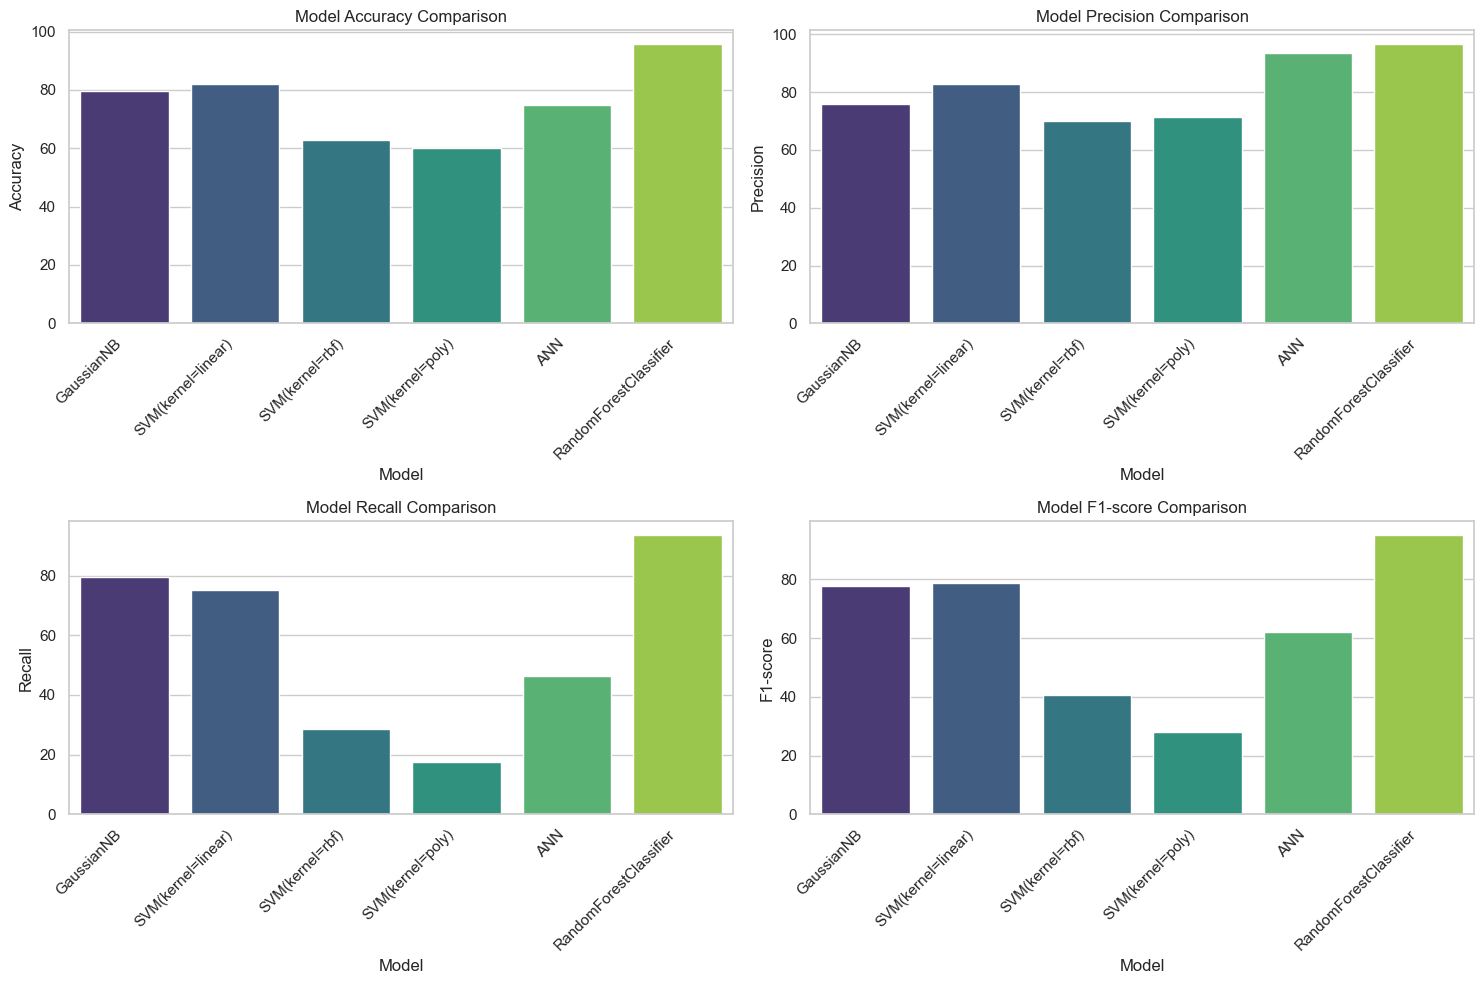

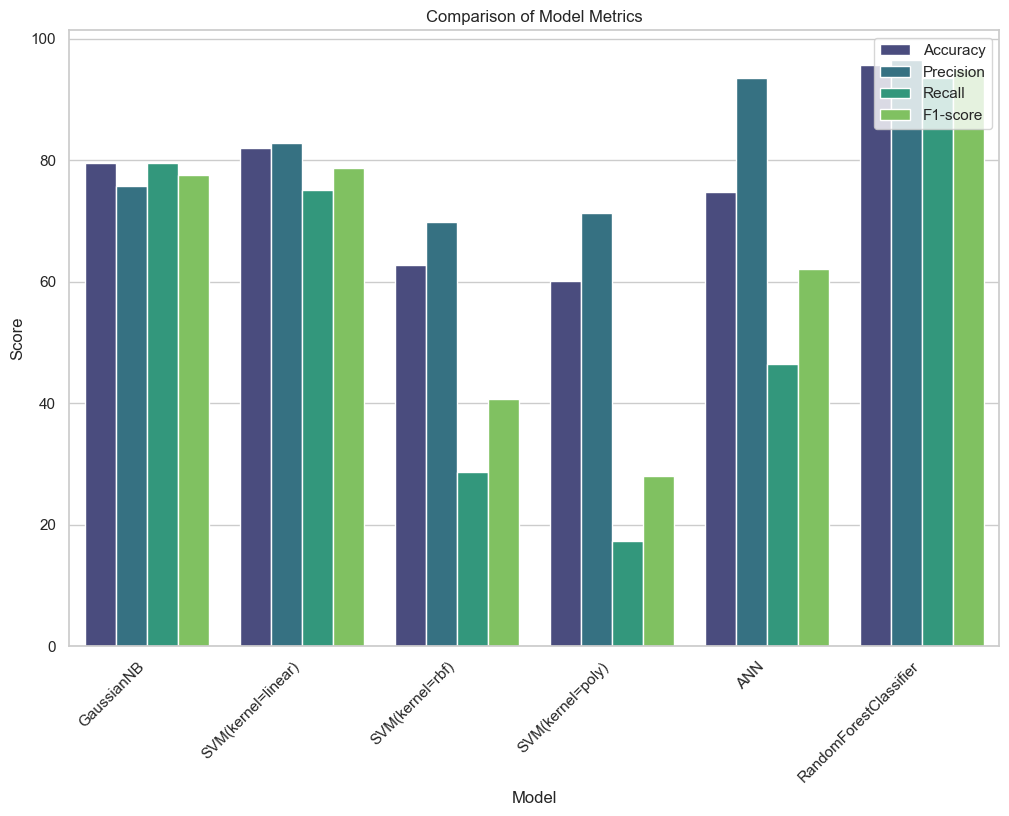

In [4]:
data = {
    'Model': ['GaussianNB', 'SVM(kernel=linear)', 'SVM(kernel=rbf)', 'SVM(kernel=poly)', 'ANN', 'RandomForestClassifier'],
    'Accuracy': [79.59, 81.96, 62.75, 60.10, 74.74, 95.62],
    'Precision': [75.76, 82.81, 69.87, 71.23, 93.54, 96.55],
    'Recall': [79.61, 75.05, 28.68, 17.40, 46.46, 93.49],
    'F1-score': [77.64, 78.74, 40.66, 27.96, 62.09, 95.00]
}

df_compare = pd.DataFrame(data)

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Biểu đồ Accuracy
sns.barplot(x='Model', y='Accuracy', data=df_compare, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Model Accuracy Comparison')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')

# Biểu đồ Precision
sns.barplot(x='Model', y='Precision', data=df_compare, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Model Precision Comparison')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')

# Biểu đồ Recall
sns.barplot(x='Model', y='Recall', data=df_compare, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Model Recall Comparison')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')

# Biểu đồ F1-score
sns.barplot(x='Model', y='F1-score', data=df_compare, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Model F1-score Comparison')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Vẽ biểu đồ tổng hợp so sánh tất cả các chỉ số của các mô hình
df_compare_melted = df_compare.melt(id_vars=['Model'], var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_compare_melted, palette='viridis')
plt.title('Comparison of Model Metrics')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.show()